In [1]:
import pandas as pd
import numpy as np
import os
from analysis import *
import glob
import string
import plotly.graph_objects as go

In [2]:
colors = ['#e6194B', '#3cb44b', '#ffe119','#f58231','#42d4f4',
          '#f032e6','#fabed4','#469990','#aaffc3','#000075','#e6194B','#9a6324','#dcbeff']
plotted_models = ['DPN','ReXNet', 'EseVoVNet', 'TNT', 'Inception', 'HRNet', 'MobileNet', 'VGG19', 'ResNet-RS', 
                 'DenseNet', 'DPN_Magface', 'DPN_Cosface', 'SMAC']

## Setup

In [ ]:
# import pandas as pd
# import numpy as np
# import os
# from analysis import *
# import glob
# import plotly.io as pio
# pio.renderers.default = 'notebook'
# pd.options.mode.chained_assignment = None  # default='warn'
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# metadata = pd.read_csv('RFW_test_identities_ethnicity.csv')
# AfAs = metadata[np.logical_or(metadata.ethnicity == 'African', metadata.ethnicity == 'Asian')]
# AfAs['gender_expression'] = AfAs.ethnicity.map(lambda x: 'male' if x == 'African' else 'female' )
# AfAs.to_csv('RFW_AfAs_test_identities_ethnicity.csv')
# AfCa = metadata[np.logical_or(metadata.ethnicity == 'African', metadata.ethnicity == 'Caucasian')]
# AfCa['gender_expression'] = AfCa.ethnicity.map(lambda x: 'male' if x == 'African' else 'female' )
# AfCa.to_csv('RFW_AfCa_test_identities_ethnicity.csv')
# AfIn = metadata[np.logical_or(metadata.ethnicity == 'African', metadata.ethnicity == 'Indian')]
# AfIn['gender_expression'] = AfIn.ethnicity.map(lambda x: 'male' if x == 'African' else 'female' )
# AfIn.to_csv('RFW_AfIn_test_identities_ethnicity.csv')
# AsCa = metadata[np.logical_or(metadata.ethnicity == 'Asian', metadata.ethnicity == 'Caucasian')]
# AsCa['gender_expression'] = AsCa.ethnicity.map(lambda x: 'male' if x == 'Asian' else 'female' )
# AsCa.to_csv('RFW_AsCa_test_identities_ethnicity.csv')
# AsIn = metadata[np.logical_or(metadata.ethnicity == 'Asian', metadata.ethnicity == 'Indian')]
# AsIn['gender_expression'] = AsIn.ethnicity.map(lambda x: 'male' if x == 'Asian' else 'female' )
# AsIn.to_csv('RFW_AsIn_test_identities_ethnicity.csv')
# CaIn = metadata[np.logical_or(metadata.ethnicity == 'Caucasian', metadata.ethnicity == 'Indian')]
# CaIn['gender_expression'] = CaIn.ethnicity.map(lambda x: 'male' if x == 'Caucasian' else 'female' )
# CaIn.to_csv('RFW_CaIn_test_identities_ethnicity.csv')

## CelebA

In [ ]:
# import pandas as pd
# import numpy as np
# import os
# from analysis import *
# import glob
# rank_files = glob.glob('RFW/**/*_rank_by_id_val.csv')

In [ ]:
# acc_list_rfw, acc_disp_list_rfw, rank_list_rfw, acc_disp_ratio_list_rfw, rank_ratio_list_rfw, err_list_rfw, error_ratio_list_rfw = [],[],[],[],[],[],[]

# for a in ['AfAs', 'AfCa', 'AfIn', 'AsCa', 'AsIn', 'CaIn']:
#     metadata = pd.read_csv(f'RFW_{a}_test_identities_ethnicity.csv')

#     epochs = ['epoch_'+str(i) for i in [99]]
#     acc_df_rfw, acc_disp_df_rfw, rank_df_rfw = analyze_rank_files(rank_files, metadata, epochs=epochs)
#     _, acc_disp_ratio_df_rfw, rank_ratio_df_rfw = analyze_rank_files(rank_files, metadata, ratio=True, epochs=epochs)
#     err_df_rfw, error_ratio_df_rfw, _ = analyze_rank_files(rank_files, metadata, ratio=True, error=True, epochs=epochs)
#     acc_list_rfw += [acc_df_rfw]
#     acc_disp_list_rfw += [acc_disp_df_rfw]
#     rank_list_rfw += [rank_df_rfw]
#     acc_disp_ratio_list_rfw += [acc_disp_ratio_df_rfw]
#     rank_ratio_list_rfw += [rank_ratio_df_rfw]
#     err_list_rfw += [err_df_rfw]
#     error_ratio_list_rfw += [error_ratio_df_rfw]

In [ ]:
# from functools import reduce

# def reduce_list_rfw(l, f=max):
#     df = reduce(lambda x, y: pd.merge(x, y, on = ['index','epoch']), l)

#     df['Metric'] = df.loc[:,df.columns.str.startswith('Metric')].apply(lambda x: f(x), axis=1)
#     df=df.loc[:,np.logical_not(df.columns.str.startswith('Metric_'))]
#     return df

# acc_df_rfw = reduce_list_rfw(acc_list_rfw, f=np.mean)
# acc_disp_df_rfw = reduce_list_rfw(acc_disp_list_rfw)
# rank_df_rfw = reduce_list_rfw(rank_list_rfw)
# acc_disp_ratio_df_rfw = reduce_list_rfw(acc_disp_ratio_list_rfw)
# rank_ratio_list_rfw = reduce_list_rfw(rank_ratio_list_rfw)
# err_df_rfw = reduce_list_rfw(err_list_rfw)
# error_ratio_df_rfw = reduce_list_rfw(error_ratio_list_rfw)

In [ ]:
# df = merge(err_df_rfw, rank_df_rfw)
# df = df[df['epoch'] == 99]
# df = df.rename(columns={'Accuracy':'Error','Disparity':'Rank Disparity'})
# df = df.dropna()
# # df = df[df['Error']<1-1/(7636*2)]
# # df.loc[:,'model'] = df['index'].apply(lambda x: get_name_details(x)[1])
# df = df.sort_values(by=['index'])
# # remove 040
# df = df[df['index'].apply(lambda x: '040' not in x)]
# # df_high_perf = df[df['index'].apply(lambda x: x in list(high_perf_models))]
# df_high_perf = df
# df_high_perf.loc[:,'Model'] = 'timm models'
# # df['Disparity'] = np.log(df['Disparity'])
# fig = px.scatter(data_frame = df_high_perf
#            ,x = 'Error'
#            ,y = 'Rank Disparity',
# #             color='Model',
#              template="simple_white",
#                  width=1200, height= 1000
#            )
# fig.update_traces(marker=dict(size=10))

# fig.add_trace(go.Scatter(
#     x=df[df['index'].apply(lambda x: 'Check' in x)]['Error'],
#     y=df[df['index'].apply(lambda x: 'Check' in x)]['Rank Disparity'],
#     mode='markers',
#     name = 'SMAC',
#     marker_color = colors[-1],
#     marker = dict(size=20),
# ))
# # plot PFront
# p = np.array(preparePareto(df[df['index'].apply(lambda x: 'Check' not in x)][['Error','Rank Disparity']], 
#                            False, False).dropna())
# for x, y in zip(p[:-1], p[1:]):
#     fig.add_shape(type='line',
#                 x0=x[0],y0=x[1],x1=y[0],y1=y[1],
#                 line=dict(color='gray',width=4),line_dash='dash',
#                 xref='x',yref='y', col=1,row=1)
    
# fig.update_layout(
#     xaxis_range=[.35,max(df_high_perf['Error'])],
#     yaxis_range=[0,500],
#     font=dict(
#         family="Times New Roman",
#         size=38,
#         color="Black"
#     )
# )


# pareto_df = pd.merge(df_high_perf, pd.DataFrame(p), 
#                            right_on=[0,1], left_on=["Error","Rank Disparity"])
# pareto_df.loc[:,'model'] = pareto_df['index'].apply(lambda x: get_name_details(x)[1].split('_')[0])

# # # plot PFront for Ranks
# # for model in set(pareto_df['model']):
# #     i = [x.lower()[:3] for x in plotted_models].index(model.lower()[:3])
# #     name = plotted_models[i]
# #     color = colors[i]
# #     fig.add_trace(go.Scatter(
# #         x=pareto_df[pareto_df['model'] == model]['Error'],
# #         y=pareto_df[pareto_df['model'] == model]['Rank Disparity'],
# #         mode='markers',
# #         name = name,
# #         marker_color = color,
# #         marker = dict(size=20),
# #     ))

# fig.update_layout(showlegend=False)
# fig.show()
# # plotly.io.write_image(fig, '_rfw.png', format='png')

## CelebA Unified

In [39]:
import pandas as pd
import numpy as np
import os
from analysis import *
import glob
from functools import reduce

def reduce_list_rfw(l, f=max):
    df = reduce(lambda x, y: pd.merge(x, y, on = ['index','epoch']), l)

    df['Metric'] = df.loc[:,df.columns.str.startswith('Metric')].apply(lambda x: f(x), axis=1)
    df=df.loc[:,np.logical_not(df.columns.str.startswith('Metric_'))]
    return df

def reduce_results(results, split, write=False):
    mean_acc = reduce(lambda x, y: pd.merge(x, y, on='index'), [x['acc_df'] for x in results if x['split'] == split]).mean(axis=1)
    mean_rank = reduce(lambda x, y: pd.merge(x, y, on='index'), [x['disp_df'] for x in results if x['split'] == split]).mean(axis=1)
    std_acc = reduce(lambda x, y: pd.merge(x, y, on='index'), [x['acc_df'] for x in results if x['split'] == split]).sem(axis=1)
    std_rank = reduce(lambda x, y: pd.merge(x, y, on='index'), [x['disp_df'] for x in results if x['split'] == split]).sem(axis=1)

    df = pd.DataFrame(columns = ['Accuracy_mean', 'Accuracy_std', 'Disparity_mean', 'Disparity_std'])
    df['Accuracy_mean'] = mean_acc
    df['Disparity_mean'] = mean_rank
    df['Accuracy_std'] = std_acc
    df['Disparity_std'] = std_rank
    df['Model'] = [x[:x.find('Face')-4] if 'dpn' not in x else x[:x.find('Face')+4].replace('dpn107','DPN') for x in df.index]
    if write:
        df.to_csv(f'vggface_phase1_{split}.csv')
    return df

In [41]:
def make_tables(metric_function_output, **args):
    results = []
    for split in ['val','test']:
        for seed in [333,444,555,666]:
            acc_list_rfw, disp_list_rfw = [],[]
            rank_files = glob.glob(f'RFW_celeba/**_{seed}/**/*.pkl')
            for a in ['AfAs', 'AfCa', 'AfIn', 'AsCa', 'AsIn', 'CaIn']:
                metadata = pd.read_csv(f'RFW_{a}_test_identities_ethnicity.csv')

                epochs = ['epoch_'+str(i) for i in [101]]
                acc_df_vgg, _, _ = analyze_pickle_files([[x] for x in rank_files], metadata, epochs=epochs)
                disp_df = analyze_pickle_files([[x] for x in rank_files], metadata, epochs=epochs, **args)[metric_function_output]
                acc_df_vgg['Metric'] = 1 - acc_df_vgg['Metric']
                
                acc_list_rfw += [acc_df_vgg]
                disp_list_rfw += [disp_df]

            acc_df_rfw = reduce_list_rfw(acc_list_rfw, f=np.mean)
            disp_df_rfw = reduce_list_rfw(disp_list_rfw)
                
            res = {
                'split': split,
                'seed': seed,
                'acc_df': acc_df_rfw[['index','Metric']].set_index('index'),
                'disp_df': disp_df_rfw[['index','Metric']].set_index('index')
                  }
            results += [res]
    df_val = reduce_results(results, 'val')
    df_test = reduce_results(results, 'test')
    return df_val, df_test

In [42]:
def plot_figure(metric_name, metric_suffix, split, df):
    fig = px.scatter(df, 
                     x='Accuracy_mean', 
                     y='Disparity_mean', 
                     error_x = "Accuracy_std", 
                     error_y = "Disparity_std", 
                     color="Model", 
                     color_discrete_map=color_map,
                     template="simple_white",
                     width=1200, height= 1000
                    )
#     if metric_name == 'Rank Disparity':
#         fig.update_layout(
#             xaxis_range=[0,0.15],
#             yaxis_range=[-.01,.6]
#         )
    fig.update_layout(
        xaxis_title="Error",
        yaxis_title=metric_name,
        title="Trained on CelebA; Tested on RFW",
        legend_title="Models",
        font=dict(
            family="Times New Roman",
            size=30,
            color="Black"
        )
    )
    fig.update_traces(marker=dict(size=20))
#     fig.update_layout(legend=dict(
#         orientation="h",
#         yanchor="bottom",
#         y=1.02,
#         xanchor="right",
#         x=1,
#         font=dict(
#             family="Times New Roman",
#             size=28,
#             color="Black"
#         )
#     ))
    p = np.array(preparePareto(df[['Accuracy_mean','Disparity_mean']], False, False).dropna())
    for x, y in zip(p[:-1], p[1:]):
        fig.add_shape(type='line',
                    x0=x[0],y0=x[1],x1=y[0],y1=y[1],
                    line=dict(color='gray',width=4),line_dash='dash',
                    xref='x',yref='y')
#     plotly.io.write_image(fig, f'_RQ2_{split}_vgg_{metric_suffix}.png', format='png')
    fig.show()

In [43]:
colors = ['#e6194B', '#3cb44b', '#ffe119','#f58231','#42d4f4',
          '#f032e6','#fabed4','#469990','#aaffc3','#000075','#e6194B','#9a6324','#dcbeff', '#42d4f4']
plotted_models = ['DPN','ReXNet', 'Other', 'TNT', 'Inception', 'HRNet', 'EseVoVNet', 'VGG19', 'ResNet-RS', 
                 'DenseNet', 'DPN_MagFace', 'DPN_CosFace', 'SMAC', 'Swin_Transformer']
color_map = {}
for c,m in zip(colors,plotted_models):
    color_map[m] = c

In [44]:
def phase2(metric_name, metric_suffix, metric_function_output, plot=False, **args):
    lookup = {
        'Checkpoints_Edges_301_LR_0.13828312564892567_Head': 'SMAC',
        'Checkpoints_Edges_600_LR_0.6708884458871945_Head': 'SMAC',
        'Checkpoints_Edges_248_LR_0.09532880096168164_Head': 'SMAC',
        'Checkpoints_Edges_258_LR_0.1404172769842098_Head': 'SMAC',
        'Checkpoints_Edges_680_LR_0.0006048015915653069_Head': 'SMAC',
        'Checkpoints_Edges_010_LR_0.32348738788346576_Head': 'SMAC',
        'Checkpoints_Edges_000_LR_0.2813375341651194_Head': 'SMAC',
        'coat_lite_small': 'Other',
        'convit_base': 'Other',
        'cspdarknet53': 'Other',
        'densenet161': 'DenseNet',
        'dla102x2': 'Other',
        'DPN_ArcFace': 'Other',
        'DPN_MagFace': 'DPN_MagFace',
        'DPN_CosFace': 'DPN_CosFace',
        'ese_vovnet39b': 'EseVoVNet',
        'hrnet_w64': 'HRNet',
        'jx_nest_base': 'Other',
        'mobilenetv3_large_100': 'Other',
        'rexnet_200': 'ReXNet',
        'swin_base_patch4_window7_224': 'Swin_Transformer',
        'tf_efficientnet_b7_ns': 'Other',
        'tnt_s_patch16_224': 'TNT',
        'twins_svt_large': 'Other'
    }
    
    df_val, df_test = make_tables(metric_function_output, **args)
    df_val['Model'] = df_val['Model'].apply(lambda l: lookup[l])
    df_test['Model'] = df_test['Model'].apply(lambda l: lookup[l])
    if plot:
        plot_figure(metric_name, metric_suffix, 'val', df_val)
        plot_figure(metric_name, metric_suffix, 'test', df_test)   
    return df_val, df_test

/tmp/ipykernel_2872641/2370129866.py:9: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Metric_x'} in the result is deprecated and will raise a MergeError in a future version.

/tmp/ipykernel_2872641/2370129866.py:9: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Metric_x'} in the result is deprecated and will raise a MergeError in a future version.

/tmp/ipykernel_2872641/2370129866.py:9: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Metric_x'} in the result is deprecated and will raise a MergeError in a future version.

/tmp/ipykernel_2872641/2370129866.py:9: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Metric_x'} in the result is deprecated and will raise a MergeError in a future version.

/tmp/ipykernel_2872641/2370129866.py:9: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Metric_x'} in the result is deprecated and will raise a MergeError in a future version.

/tmp/ipykernel_28726

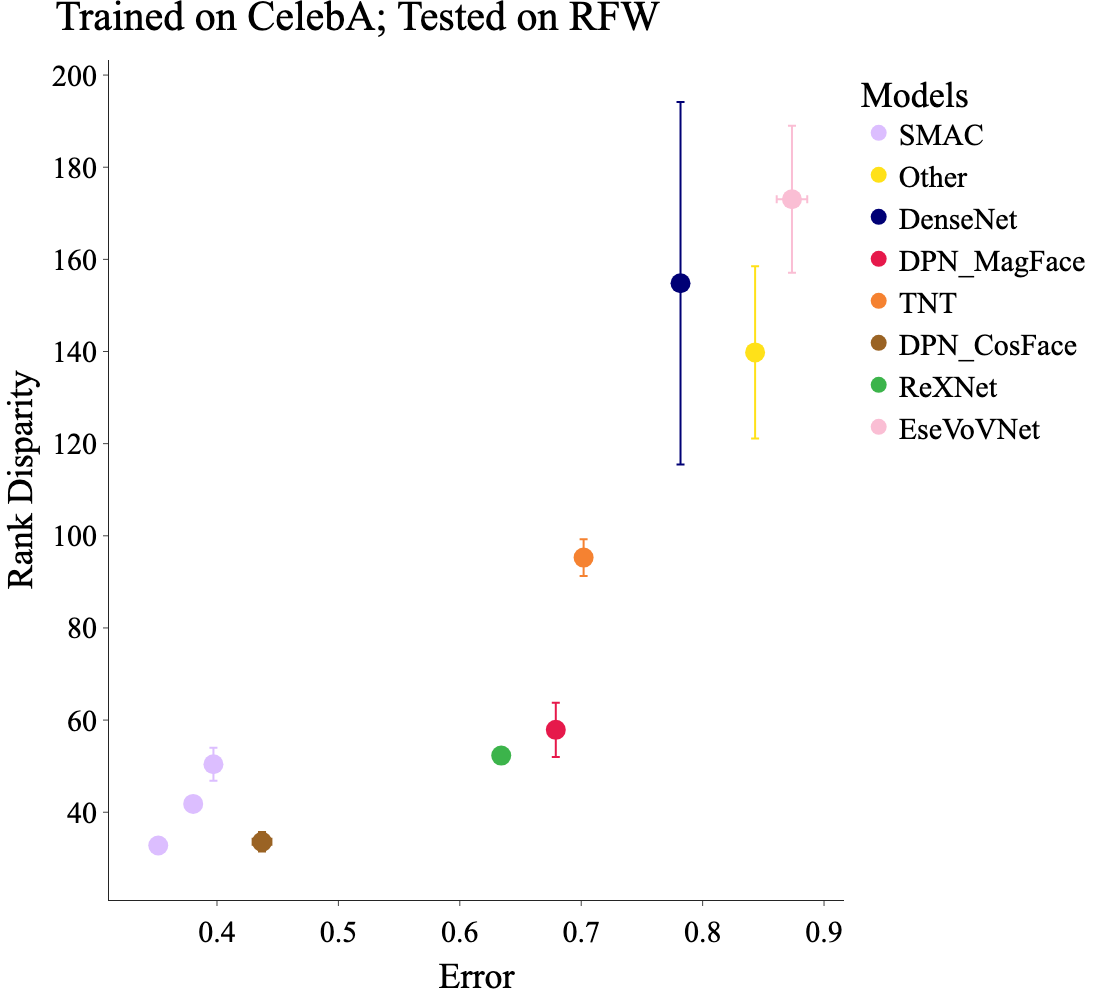

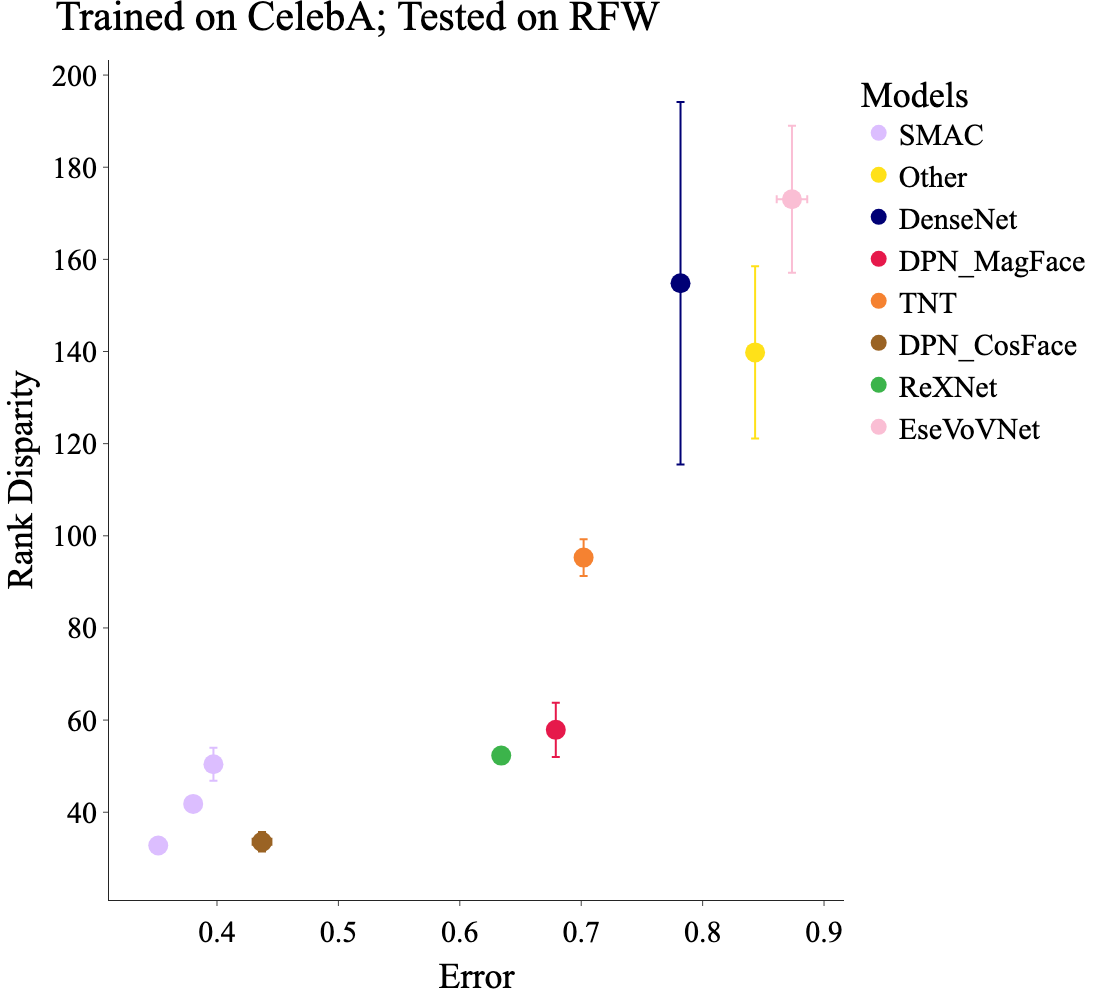

In [45]:
df_val, df_test = phase2('Rank Disparity', '', 2, plot=True)
# df_val, df_test = phase2('Disparity','disparity', 1, plot=True)
# df_val, df_test = phase2('Rank Ratio', 'rank_ratio', 2, ratio=True, plot=True)
# df_val, df_test = phase2('Ratio', 'ratio', 1, ratio=True, plot=True)
# df_val, df_test = phase2('Error Ratio', 'error_ratio', 1, ratio=True, error=True, plot=True)

## VGGFace2

In [30]:
def make_tables(metric_function_output, **args):
    results = []
    for split in ['val','test']:
        metadata = pd.read_csv(f'vggface2_{split}_identities_gender.csv')
        for seed in [111,222,333]:
            acc_list_rfw, disp_list_rfw = [],[]
            rank_files = glob.glob(f'RFW_vggface2/**_{seed}/**/*11_test.pkl')
            for a in ['AfAs', 'AfCa', 'AfIn', 'AsCa', 'AsIn', 'CaIn']:
                metadata = pd.read_csv(f'RFW_{a}_test_identities_ethnicity.csv')

                epochs = ['epoch_'+str(i) for i in [11]]
                acc_df_vgg, _, _ = analyze_pickle_files([[x] for x in rank_files], metadata, epochs=epochs)
                disp_df = analyze_pickle_files([[x] for x in rank_files], metadata, epochs=epochs, **args)[metric_function_output]
                acc_df_vgg['Metric'] = 1 - acc_df_vgg['Metric']
                
                acc_list_rfw += [acc_df_vgg]
                disp_list_rfw += [disp_df]

            acc_df_rfw = reduce_list_rfw(acc_list_rfw, f=np.mean)
            disp_df_rfw = reduce_list_rfw(disp_list_rfw)
                
            res = {
                'split': split,
                'seed': seed,
                'acc_df': acc_df_rfw[['index','Metric']].set_index('index'),
                'disp_df': disp_df_rfw[['index','Metric']].set_index('index')
                  }
            results += [res]
    df_val = reduce_results(results, 'val')
    df_test = reduce_results(results, 'test')
    return df_val, df_test

In [35]:
def plot_figure(metric_name, metric_suffix, split, df):
    fig = px.scatter(df, 
                     x='Accuracy_mean', 
                     y='Disparity_mean', 
                     error_x = "Accuracy_std", 
                     error_y = "Disparity_std", 
                     color="Model", 
                     color_discrete_map=color_map,
                     template="simple_white",
                     width=1200, height= 1000
                    )
#     if metric_name == 'Rank Disparity':
#         fig.update_layout(
#             xaxis_range=[0,0.15],
#             yaxis_range=[-.01,.6]
#         )
    fig.update_layout(
        xaxis_title="Error",
        yaxis_title=metric_name,
        title="Trained on VGGFace2; Tested on RFW",
        legend_title="Models",
        font=dict(
            family="Times New Roman",
            size=30,
            color="Black"
        )
    )
    fig.update_traces(marker=dict(size=20))
#     fig.update_layout(legend=dict(
#         orientation="h",
#         yanchor="bottom",
#         y=1.02,
#         xanchor="right",
#         x=1,
#         font=dict(
#             family="Times New Roman",
#             size=28,
#             color="Black"
#         )
#     ))
    p = np.array(preparePareto(df[['Accuracy_mean','Disparity_mean']], False, False).dropna())
    for x, y in zip(p[:-1], p[1:]):
        fig.add_shape(type='line',
                    x0=x[0],y0=x[1],x1=y[0],y1=y[1],
                    line=dict(color='gray',width=4),line_dash='dash',
                    xref='x',yref='y')
#     plotly.io.write_image(fig, f'_RQ2_{split}_vgg_{metric_suffix}.png', format='png')
    fig.show()

In [36]:
colors = ['#e6194B', '#3cb44b', '#ffe119','#f58231','#42d4f4',
          '#f032e6','#fabed4','#469990','#aaffc3','#000075','#e6194B','#9a6324','#dcbeff', '#42d4f4']
plotted_models = ['DPN','ReXNet', 'Other', 'TNT', 'Inception', 'HRNet', 'EseVoVNet', 'VGG19', 'ResNet-RS', 
                 'DenseNet', 'DPN_MagFace', 'DPN_CosFace', 'SMAC', 'Swin_Transformer']
color_map = {}
for c,m in zip(colors,plotted_models):
    color_map[m] = c

In [37]:
def phase2(metric_name, metric_suffix, metric_function_output, plot=False, **args):
    lookup = {
        'Checkpoints_Edges_301_LR_0.13828312564892567_Head': 'SMAC',
        'Checkpoints_Edges_600_LR_0.6708884458871945_Head': 'SMAC',
        'Checkpoints_Edges_248_LR_0.09532880096168164_Head': 'SMAC',
        'Checkpoints_Edges_258_LR_0.1404172769842098_Head': 'SMAC',
        'coat_lite_small': 'Other',
        'convit_base': 'Other',
        'cspdarknet53': 'Other',
        'dla102x2': 'Other',
        'DPN_ArcFace': 'Other',
        'DPN_MagFace': 'DPN_MagFace',
        'DPN_CosFace': 'DPN_CosFace',
        'ese_vovnet39b': 'EseVoVNet',
        'hrnet_w64': 'HRNet',
        'jx_nest_base': 'Other',
        'rexnet_200': 'ReXNet',
        'swin_base_patch4_window7_224': 'Swin_Transformer',
        'tf_efficientnet_b7_ns': 'Other',
        'tnt_s_patch16_224': 'TNT',
        'twins_svt_large': 'Other'
    }
    
    df_val, df_test = make_tables(metric_function_output, **args)
    df_val['Model'] = df_val['Model'].apply(lambda l: lookup[l])
    df_test['Model'] = df_test['Model'].apply(lambda l: lookup[l])
    if plot:
        plot_figure(metric_name, metric_suffix, 'val', df_val)
        plot_figure(metric_name, metric_suffix, 'test', df_test)   
    return df_val, df_test

/tmp/ipykernel_2872641/2370129866.py:9: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Metric_x'} in the result is deprecated and will raise a MergeError in a future version.

/tmp/ipykernel_2872641/2370129866.py:9: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Metric_x'} in the result is deprecated and will raise a MergeError in a future version.

/tmp/ipykernel_2872641/2370129866.py:9: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Metric_x'} in the result is deprecated and will raise a MergeError in a future version.

/tmp/ipykernel_2872641/2370129866.py:9: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Metric_x'} in the result is deprecated and will raise a MergeError in a future version.

/tmp/ipykernel_2872641/2370129866.py:9: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Metric_x'} in the result is deprecated and will raise a MergeError in a future version.

/tmp/ipykernel_28726

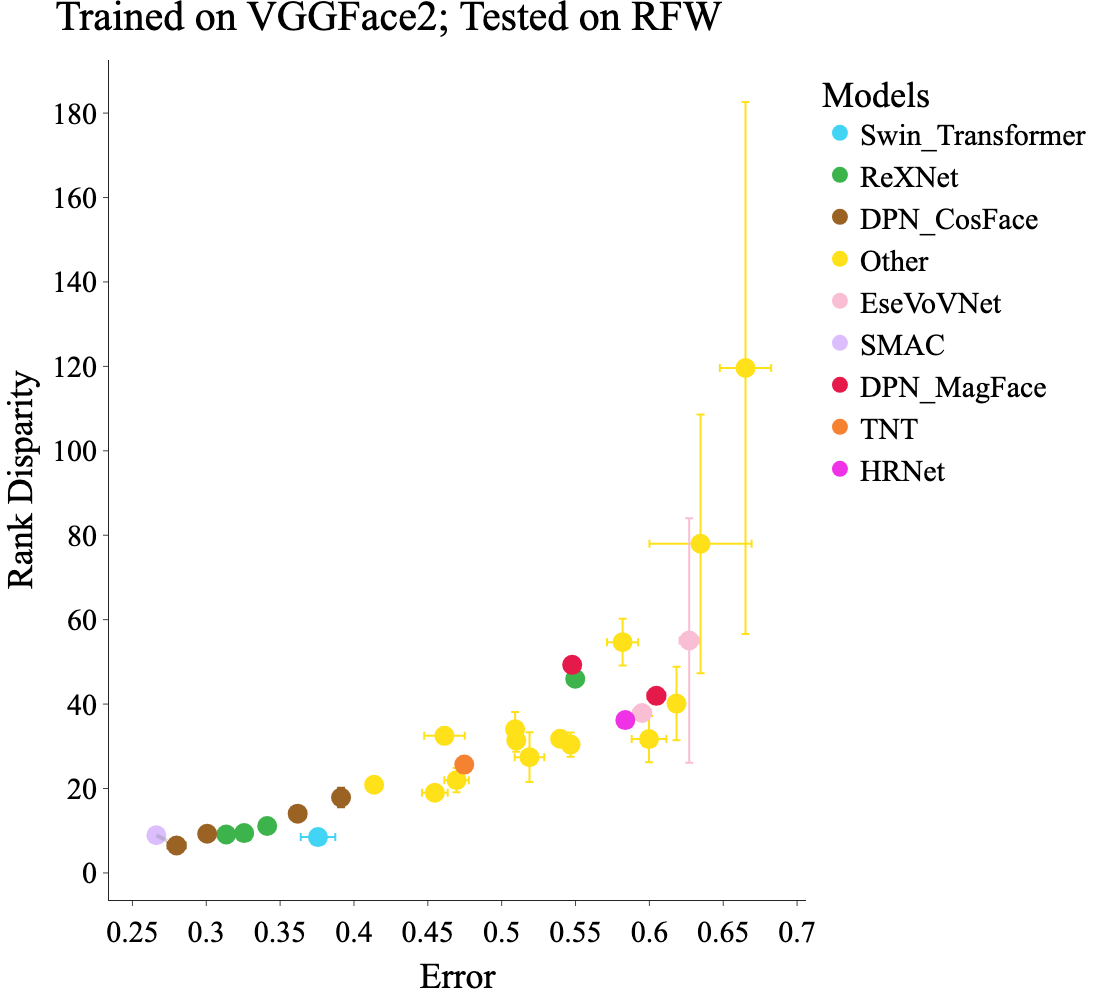

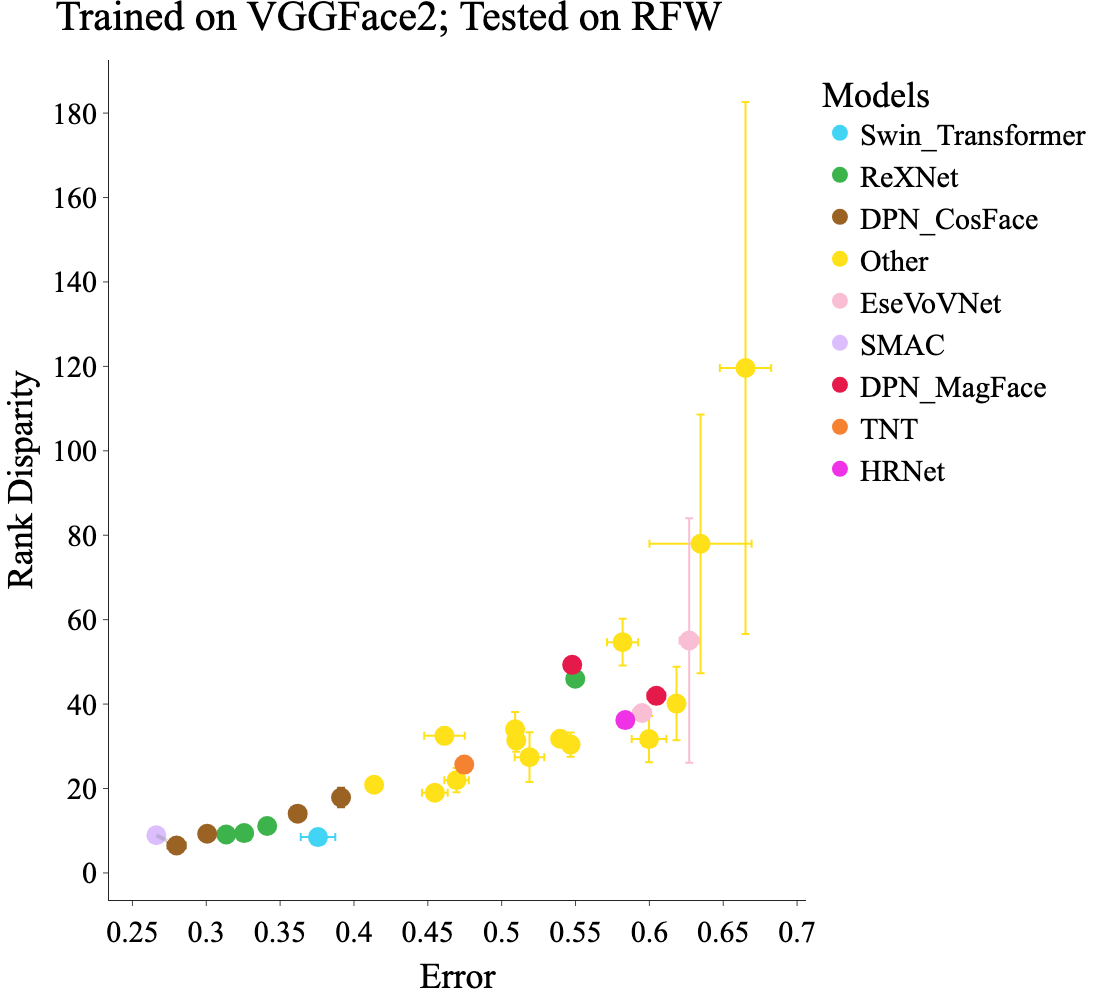

In [38]:
df_val, df_test = phase2('Rank Disparity', '', 2, plot=True)
# df_val, df_test = phase2('Disparity','disparity', 1, plot=True)
# df_val, df_test = phase2('Rank Ratio', 'rank_ratio', 2, ratio=True, plot=True)
# df_val, df_test = phase2('Ratio', 'ratio', 1, ratio=True, plot=True)
# df_val, df_test = phase2('Error Ratio', 'error_ratio', 1, ratio=True, error=True, plot=True)